In [ ]:
# Para visuzalización en notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 16
from IPython.display import Audio, Markdown, Image

def dmd(x):
    display(Markdown(x))

# Números y Datos
import numpy as np
import pandas as pd
import random

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

## Clustering (otros)
#!pip install gower
#import gower

#!pip install scikit-learn-extra 
#from sklearn_extra.cluster import KMedoids 

## Link con el Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/00_Docencia/0000_DMCT/2021_DMCT


/content/drive/MyDrive/00_Docencia/0000_DMCT/2021_DMCT


In [ ]:
import funciones as fn

# Preparación de un dataset de prueba

In [ ]:
a=np.concatenate((np.tile(2,40),np.tile(6,40),np.tile(12,40),np.tile(19,40),np.tile(26,40)))
b=np.concatenate((np.tile(3,40),np.tile(6,40),np.tile(14,120)))
c=np.concatenate((np.tile(12,80),np.tile(18,40),np.tile(2,40),np.tile(30,40)))
clase=np.concatenate((np.tile('a',40),np.tile('b',40),np.tile('c',40),np.tile('d',40),np.tile('e',40)))

In [ ]:
# Sin ruido
df0 = pd.DataFrame({'A': a, 'B': b, 'C': c, 'clase': clase})

# Con poco ruido
atmp = a + np.random.normal(0, 1.0, 200)
btmp = b + np.random.normal(0, 1.0, 200)
ctmp = c + np.random.normal(0, 1.0, 200)
df1 = pd.DataFrame({'A': atmp, 'B': btmp, 'C': ctmp, 'clase': clase})

# Con más ruido
atmp = a + np.random.normal(0, 5.0, 200)
btmp = b + np.random.normal(0, 5.0, 200)
ctmp = c + np.random.normal(0, 5.0, 200)
df2 = pd.DataFrame({'A': atmp, 'B': btmp, 'C': ctmp, 'clase': clase})

In [ ]:
df1

,A,B,C,clase
0,1.231831,3.163880,11.793334,a
1,2.225921,1.778607,12.108432,a
2,0.602585,2.644607,13.578089,a
3,0.333719,1.848144,12.427575,a
4,1.798895,1.741076,12.271691,a
...,...,...,...,...
195,25.660251,13.580549,30.018333,e
196,26.755644,13.094756,30.464709,e
197,26.861881,12.509182,29.166985,e
198,26.651208,14.619290,31.871262,e


In [ ]:
# Aleatorizo el orden de los registros para que sea más real
df0 = df0.sample(frac=1).reset_index(drop=True)
df1 = df1.sample(frac=1).reset_index(drop=True)
df2 = df2.sample(frac=1).reset_index(drop=True)

In [ ]:
df2

,A,B,C,clase
0,26.807716,11.045951,7.892001,d
1,7.496512,19.835790,19.430974,c
2,27.147796,8.815626,36.974735,e
3,20.594992,21.179072,26.545500,e
4,24.769791,5.879335,28.874734,e
...,...,...,...,...
195,-1.040408,-1.724352,15.334433,a
196,12.643049,4.972302,10.033610,a
197,9.851685,12.062764,17.963204,c
198,23.442646,13.446753,27.158790,e


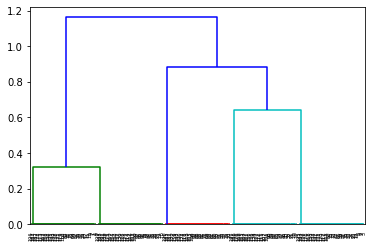

In [ ]:
df=df0.drop(['clase'], axis=1)
df=scaler.fit_transform(df)
z = linkage(df, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z)

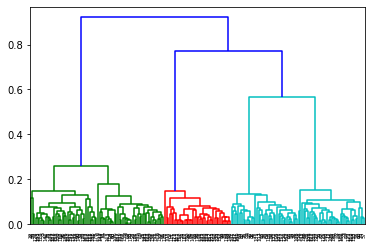

In [ ]:
df=df1.drop(['clase'], axis=1)
df=scaler.fit_transform(df)
z = linkage(df, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z)

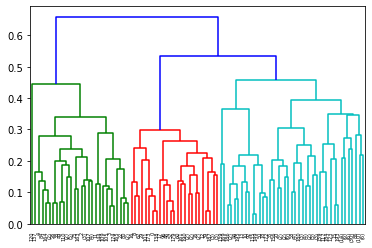

In [ ]:
df=df2.drop(['clase'], axis=1)
df=scaler.fit_transform(df)
z = linkage(df, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z,p=7,truncate_mode='level')

# Tendencia al clustering (Hopkins)
El método de Hopkins consiste en generar p puntos distribuidos al azar en el espacio muestral, y además extraer p puntos reales del dataset. Luego se calculan las distancias a los vecinos más próximos dentro del subconjunto de datos generados al azar (u) y dentro del subconjunto de datos extraídos del dataset (w), con estos se calcula el coeficiente de Hopkins (H) como sum_i(w_i)/(sum_i(u_i)+sum_i(w_i)). Si los nuevos puntos están igual de alejados que los tomados al azar, entonces sum(u) ~ sum(w) y H ~ 0.5. En cambio, si sum(u) >> sum(w), es decir que en promedio están menos agrupados los que se encuentran al azar, entonces H << 0.5.

In [ ]:
n = df.shape[0] # filas
d = df.shape[1] # columnas
m = 20 # cantidad de puntos al azar

nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(df) # buscador de vecinos

rand_ind = random.sample(range(0, n, 1), m) # indices al azar

ui = []
wi = []
for j in range(0, m):
    u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
    ui.append(u_dist[0][1])
    w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
    wi.append(w_dist[0][1])

H = sum(wi) / (sum(ui) + sum(wi))
H

0.033002446554579117

In [ ]:
def Hopkins(df,*args):
    n = df.shape[0] # filas
    d = df.shape[1] # columnas
    if not args:
        print("Numero de puntos al azar por defecto")
        m = int(0.1 * n) # cantidad de puntos al azar (default)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(df) # buscador de vecinos

    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
        ui.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        wi.append(w_dist[0][1])

    H = sum(wi) / (sum(ui) + sum(wi))
    return H

In [ ]:
df=df0.drop(['clase'], axis=1)
df=scaler.fit_transform(df)
Hopkins(df)

Numero de puntos al azar por defecto


0.0

In [ ]:
df=df1.drop(['clase'], axis=1)
df=scaler.fit_transform(df)
Hopkins(df)

Numero de puntos al azar por defecto


0.01992450555904831

In [ ]:
df=df2.drop(['clase'], axis=1)
df=scaler.fit_transform(df)
Hopkins(df,20)

0.055118547190652165

# Validación externa (en k-medias)
Ahora vamos a usar la variable 'clase'

In [ ]:
df=df0.drop(['clase'], axis=1)
kmeans0 = KMeans(n_clusters=5, random_state=0).fit(df)
kmeans0.labels_

array([2, 4, 3, 3, 3, 0, 4, 4, 3, 4, 1, 0, 3, 4, 3, 4, 2, 4, 2, 0, 3, 2,
       2, 0, 4, 3, 0, 1, 0, 4, 0, 0, 3, 3, 3, 3, 2, 4, 4, 1, 2, 3, 1, 1,
       2, 0, 2, 2, 0, 3, 1, 1, 1, 2, 2, 4, 1, 4, 4, 3, 1, 1, 1, 1, 4, 2,
       3, 3, 1, 1, 4, 4, 3, 3, 3, 3, 0, 1, 4, 0, 3, 1, 1, 2, 4, 1, 1, 2,
       1, 2, 2, 0, 1, 0, 4, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 3, 1,
       4, 2, 0, 1, 0, 3, 2, 3, 1, 4, 3, 0, 2, 1, 0, 3, 0, 2, 2, 0, 0, 4,
       1, 3, 2, 4, 2, 0, 4, 4, 1, 3, 3, 4, 3, 4, 4, 1, 1, 3, 0, 2, 0, 4,
       0, 3, 2, 0, 4, 1, 0, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 3, 1, 4, 4, 0,
       2, 4, 0, 3, 1, 1, 4, 1, 4, 1, 2, 4, 2, 0, 1, 0, 3, 0, 3, 3, 4, 2,
       0, 0], dtype=int32)

In [ ]:
tmp = pd.DataFrame({'Labels': df0.clase, 'Clusters': kmeans0.labels_})# Create a DataFrame with labels and varieties as columns: df
ct0 = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct0

Clusters,0,1,2,3,4
Labels,,,,,
a,0,0,0,0,40
b,40,0,0,0,0
c,0,0,0,40,0
d,0,0,40,0,0
e,0,40,0,0,0


In [ ]:
df=df2.drop(['clase'], axis=1)
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(df)
tmp = pd.DataFrame({'Labels': df2.clase, 'Clusters': kmeans2.labels_})# Create a DataFrame with labels and varieties as columns: df
ct = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct

Clusters,0,1,2,3,4
Labels,,,,,
a,14,0,2,0,24
b,29,0,1,0,10
c,9,1,29,0,1
d,1,38,1,0,0
e,0,0,1,39,0


In [ ]:
df=df1.drop(['clase'], axis=1)
kmeans1 = KMeans(n_clusters=5,init = 'random').fit(df)
tmp = pd.DataFrame({'Labels': df1.clase, 'Clusters': kmeans1.labels_})# Create a DataFrame with labels and varieties as columns: df
ct1 = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct1

Clusters,0,1,2,3,4
Labels,,,,,
a,0,0,40,0,0
b,0,40,0,0,0
c,0,0,0,0,40
d,40,0,0,0,0
e,0,0,0,40,0


In [ ]:
df=df2.drop(['clase'], axis=1)
kmeans2 = KMeans(n_clusters=5, init = 'random').fit(df)
tmp = pd.DataFrame({'Labels': df2.clase, 'Clusters': kmeans2.labels_})# Create a DataFrame with labels and varieties as columns: df
ct2 = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct2

Clusters,0,1,2,3,4
Labels,,,,,
a,0,0,0,25,15
b,0,1,0,10,29
c,1,28,0,1,10
d,38,1,0,0,1
e,0,2,38,0,0


In [ ]:
df=df2.drop(['clase'], axis=1)
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(df)
tmp = pd.DataFrame({'Labels': df2.clase, 'Clusters': kmeans2.labels_})# Create a DataFrame with labels and varieties as columns: df
ct = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct

Clusters,0,1
Labels,,
a,0,40
b,0,40
c,4,36
d,1,39
e,40,0


## Criterio de van Dongen

In [ ]:
n2=2*(sum(ct[0])+sum(ct[1]))
sumi = sum(ct.apply(np.max,axis=1))
sumj = sum(ct.apply(np.max,axis=0))
maxsumi = np.max(ct.apply(sum,axis=1))
maxsumj = np.max(ct.apply(sum,axis=0))
vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
vd

0.6097560975609756

In [ ]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [ ]:
vanDongen(ct0)

0.0

In [ ]:
vanDongen(ct1)

0.0

In [ ]:
vanDongen(ct2)

0.2754098360655738

## Efecto uniforme
Es importante hacer este tipo de evaluaciones porque el método de k-medias tiende
a formar grupos de tamaño uniforme, aun cuando las clases sean claramente no
balanceadas. Esto se llama el "efecto uniforme". Una forma rápida de evaluarlo es
calcular el coeficiente de variación (CV = desvío estándar/media) de la distribución
del tamaño de las clases. Por ejemplo, supongamos dos datasets con seis clases. En
el primer dataset el tamaño de cada clase es bastante uniforme y el segundo es
sesgado:

In [ ]:
ds1_n_clases = [55,58,51,59,49,50]
ds2_n_clases = [5,17,62,30,128,80]

In [ ]:
cv_ds1_n_clases = np.std(ds1_n_clases)/np.mean(ds1_n_clases)
cv_ds2_n_clases = np.std(ds2_n_clases)/np.mean(ds2_n_clases)

In [ ]:
print([cv_ds1_n_clases,cv_ds2_n_clases])

[0.07269999944546351, 0.7817702301317111]


En forma empírica se mostró que si las clases presentan un CV mayor que 0.85 es
bastante posible que el método de k-medias introduzca alguna distorsión en el
resultado. Si se están probando variaciones de métodos o parámetros de clustering,
una forma rápida de evaluar el efecto uniforme es calcular diferencias entre el CV de
las clases conocidas y las de las variantes probadas.
El método de k-medias también puede ser sensible a diferencias en densidad de los
grupos y a la presencia de grupos no esféricos.

## Indice Rand


In [ ]:
# a es el número de pares de objetos que aparecen juntos en un clúster y además pertenecen a la misma clase.
# b es el número de pares de objetos que pertenecen a clases diferentes y además están en clústeres diferentes.
# c es el número de pares de objetos que comparten la clase, pero se ubican en diferentes clústeres.
# d es el número de objetos que pertenecen a clases diferentes, sin embargo se agrupan en el mismo clúster.
# n es el número total de objetos

from sklearn.metrics import adjusted_rand_score

In [ ]:
df=df0.drop(['clase'], axis=1)
kmeans0 = KMeans(n_clusters=5, random_state=0).fit(df)
ari0 = adjusted_rand_score(df0.clase, kmeans0.labels_)
ari0

1.0

In [ ]:
df=df1.drop(['clase'], axis=1)
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(df)
ari1 = adjusted_rand_score(df1.clase, kmeans1.labels_)
ari1

1.0

In [ ]:
df=df2.drop(['clase'], axis=1)
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(df)
ari2 = adjusted_rand_score(df2.clase, kmeans2.labels_)
ari2

0.604849623940997

# Validación Interna
Se utilización los conceptos de cohesión (cuán cerca están dentro de un cluster) y separación (cuán separados están los clusters)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

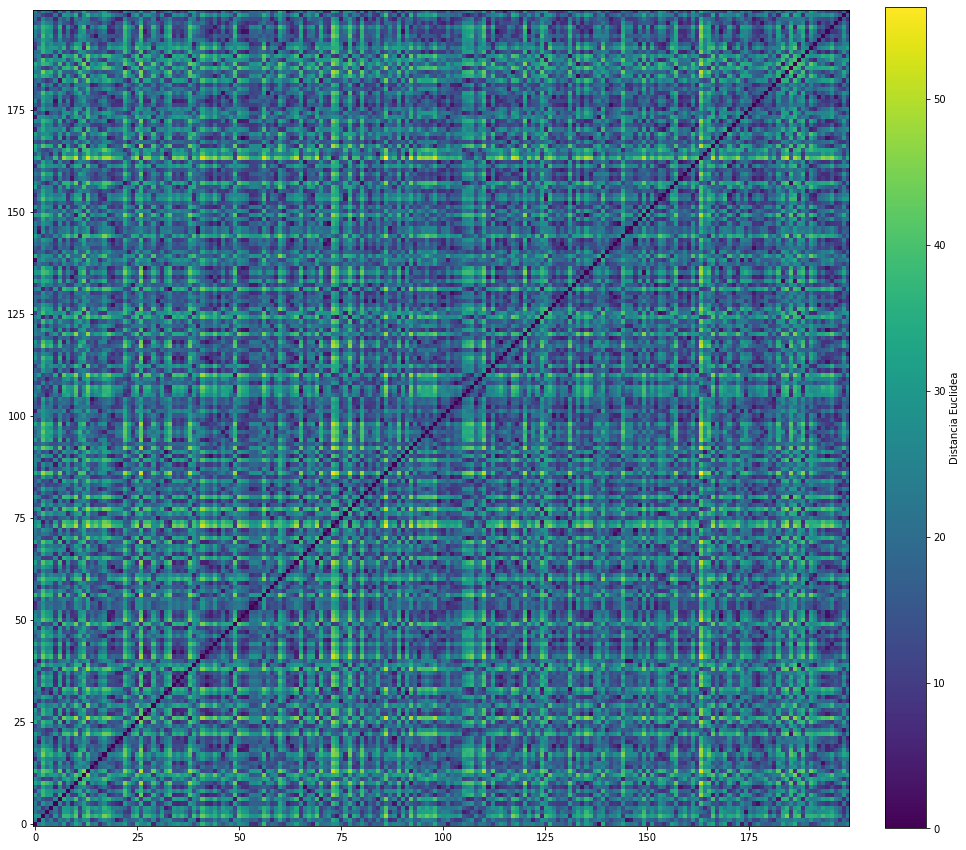

In [ ]:
df = df2.drop(['clase'], axis=1)
d  = euclidean_distances(df, df)

plt.figure(figsize=(16,16))
plt.imshow(d,aspect='auto',origin='bottom');
plt.colorbar(label='Distancia Euclidea',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
#plt.xlabel('Tiempo (segundos)');

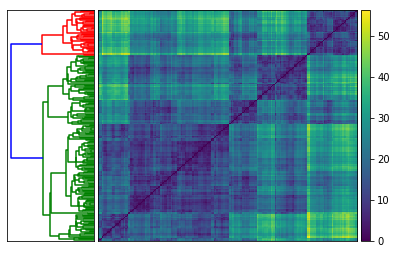

In [ ]:
import pylab

# Abrir figura nueva
fig = pylab.figure()

# Calcular dendrograma y graficar.
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = linkage(d, method='centroid')
Z = dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])
axdendro.invert_xaxis()

# Graficar la matriz de distancias.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
d = d[index,:]
d = d[:,index]
im = axmatrix.matshow(d, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Graficar la barra de color
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


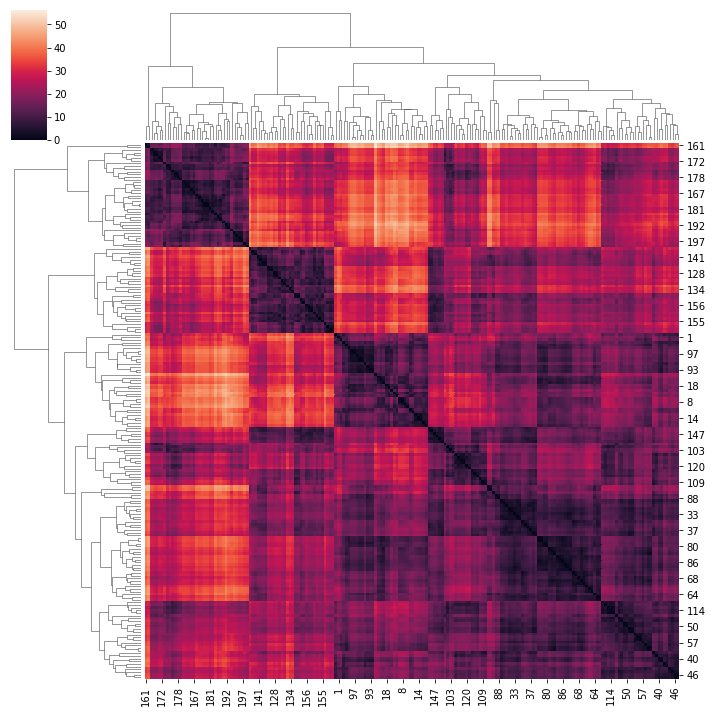

In [ ]:
sns.clustermap(d)

In [ ]:
df = df2.drop(['clase'], axis=1)
d  = euclidean_distances(df, df)
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(df)

In [ ]:
## Silhuette usando sklearn
silhouette_avg = silhouette_score(df, kmeans2.labels_)
silhouette_avg

0.33423928230963684

In [ ]:
## Silhuette usando sklearn
sample_silhouette_values = silhouette_samples(df, kmeans2.labels_)
sample_silhouette_values

array([ 0.49125027,  0.47078685,  0.53671021,  0.10132726,  0.43295553,
        0.10787641,  0.5135122 ,  0.33057943,  0.43639686,  0.40065336,
        0.30388721,  0.26358793,  0.50817483,  0.42889365,  0.25360582,
        0.13307753,  0.43524934,  0.42336471,  0.1170118 ,  0.42878788,
        0.3686211 ,  0.24589817,  0.40310306,  0.25295364,  0.17684717,
        0.38001189,  0.55332144,  0.11318194,  0.13750492,  0.45783758,
        0.43395297,  0.17649363,  0.44069877,  0.62555468,  0.03709591,
        0.14334575,  0.07536842,  0.27659845,  0.57271493,  0.53691618,
        0.50412463,  0.3243942 ,  0.06978653,  0.37188257,  0.37909539,
        0.42253178,  0.38980675,  0.34376877,  0.18857454,  0.57848829,
        0.0686674 , -0.03430474,  0.33611591,  0.33559041,  0.26080767,
        0.18099359,  0.4299951 ,  0.40866326,  0.50183955,  0.47172816,
        0.51321665,  0.49819001,  0.20186628,  0.27580953,  0.30174294,
        0.58383279,  0.41092218,  0.28480603,  0.5318772 ,  0.32

In [ ]:
# Estimar el coeficiente de Silhouette para cada cluster
cluster_labels = kmeans0.labels_
n_clusters=len(np.unique(cluster_labels))
ith_cluster_silhouette_avg = []
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_avg.append(np.mean(ith_cluster_silhouette_values)) 
ith_cluster_silhouette_avg

[0.32421230653174005,
 0.27454725397950075,
 0.35794228131653794,
 0.3448763967425814,
 0.369618172977824]

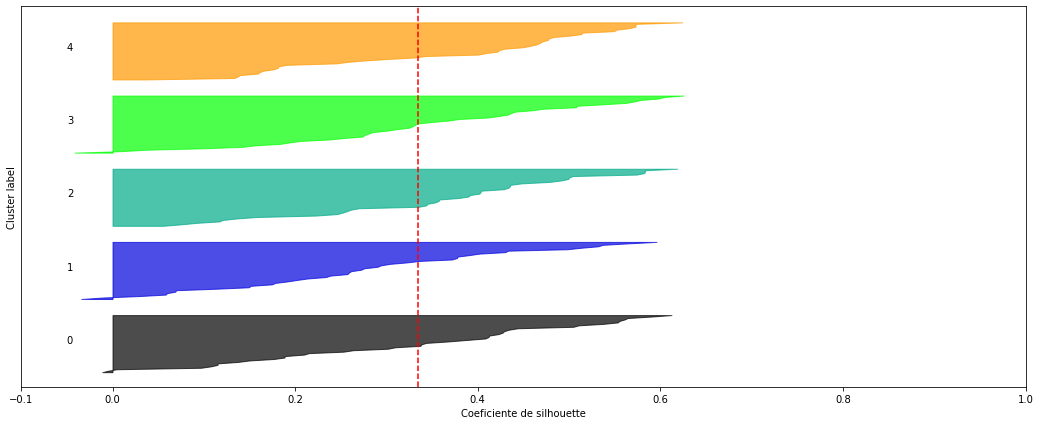

In [ ]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("Coeficiente de silhouette")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

## Validación de Clustering Jerarquico (Coeficiente de correlación cofenético)

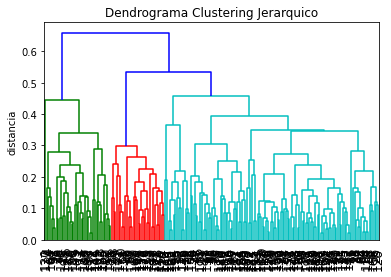

0.7304674971207737

In [ ]:
df=df2.drop(['clase'], axis=1)
df=scaler.fit_transform(df)
z = linkage(df, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

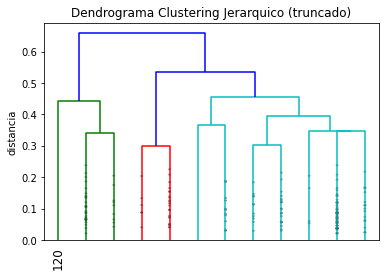

In [ ]:
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    show_leaf_counts=False, # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.title('Dendrograma Clustering Jerarquico (truncado)')
plt.ylabel('distancia')
plt.show()

In [ ]:
cluster_labels = fcluster(z, 0.4, criterion='distance')
print(np.unique(cluster_labels))
print(adjusted_rand_score(df2.clase, cluster_labels))

[1 2 3 4 5]
0.37877089726963864


In [ ]:
cluster_labels = fcluster(z, 5, criterion='maxclust')
print(np.unique(cluster_labels))
print(adjusted_rand_score(df2.clase, cluster_labels))

[1 2 3 4 5]
0.4249124103534681
